In [26]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

This is NWAY Python API
nwaylib file /Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/nwaylib/__init__.py


In [27]:
from scripts.utils import data_path, set_mpl
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import astropy.io.fits as fits
import healpy as hp
import nway_python_api as nway
%matplotlib inline

# Nway run in distnce-only mode

In [28]:
ero_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14.fits')
ero_random_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14_shifted.fits')
desi_table = nway.table_from_fits(data_path+'desi_lh.fits', poserr_value=0.1)

In [29]:

nway_res_ero = nway.nwaylib.nway_match(
[ero_table, desi_table],
match_radius = 20,
prior_completeness = 1,
)

nway_res_ero_random = nway.nwaylib.nway_match(
[ero_random_table, desi_table],
match_radius = 20,
prior_completeness = 1,
)

    adding angular separation columns
matching:  78684 matches after filtering by search radius
Primary catalogue "EROSITA" (9500), density gives 2.13e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 9500/9500 [00:02<00:00, 3332.63it/s]

Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...
matching: healpix hashing on pixel resolution ~ 36.072607 arcsec (nside=4096)
100%|██████████| 2426749/2426749 [00:09<00:00, 264374.50it/s]
matching: collecting from 56747 buckets, creating cartesian products ...
100%|██████████| 56747/56747 [00:01<00:00, 38792.30it/s]
matching: 2496531 unique matches from cartesian product. sorting ...
    adding angular separation columns
matching:  54727 matches after filtering by search radius
Primary catalogue "EROSITA" (8175), density gives 1.83e+07 objects on entire sky
Ca

In [39]:
nway_res_ero.head(2)

,EROSITA,DESI,Separation_EROSITA_DESI,Separation_max,ncat,dist_bayesfactor_uncorrected,dist_bayesfactor,dist_post,p_single,match_flag,prob_has_match,prob_this_match
0,0,-1,NaN,0.000000,1,0.000000,0.000000,1.00000,1.00000,0,0.96674,0.0
1,0,10477,0.042512,0.042512,2,10.841974,10.841974,0.96674,0.96674,1,0.96674,1.0


This is NWAY Python API
nwaylib file /Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/nwaylib/__init__.py

For a false detection rate of <1%
--> use only counterparts with p_any>0.86 (12.26% of matches)

For a false detection rate of <3%
--> use only counterparts with p_any>0.81 (22.85% of matches)

For a false detection rate of <5%
--> use only counterparts with p_any>0.77 (32.71% of matches)

For a false detection rate of <10%
--> use only counterparts with p_any>0.72 (45.58% of matches)


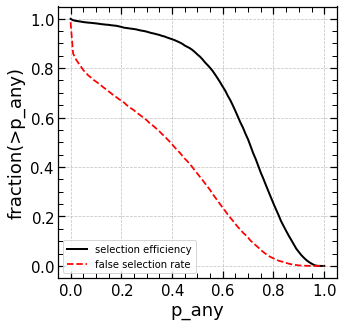

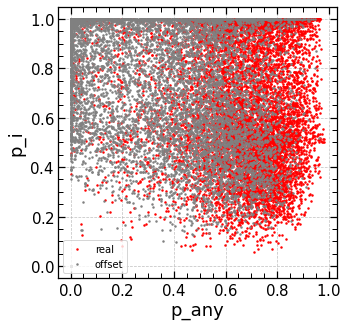

In [36]:
nway.calibrate_cutoff(nway_res_ero, nway_res_ero_random)

In [41]:
nway_res_ero.sort_values(by=['EROSITA', 'prob_this_match' ], inplace=True, ascending=[True, False])
nway_res_ero_random.sort_values(by=['EROSITA', 'prob_this_match' ], inplace=True, ascending=[True, False])

<AxesSubplot:>

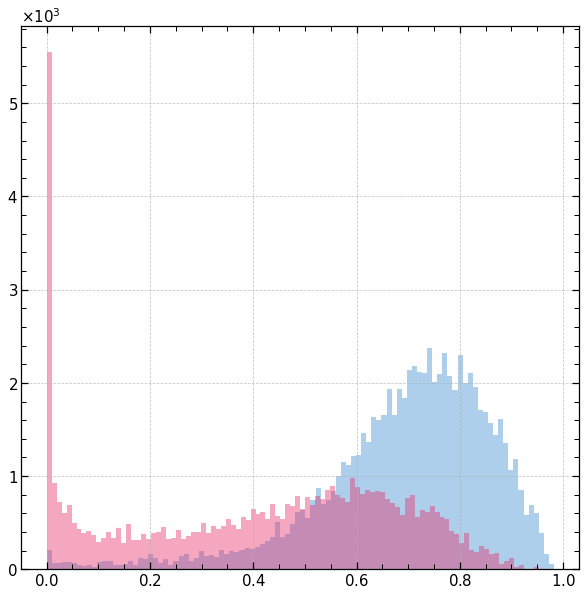

In [43]:
plt.figure(figsize=(10,10))
nway_res_ero.prob_has_match.hist(bins=100, alpha = 0.4)
nway_res_ero_random.prob_has_match.hist(bins=100, alpha = 0.4)

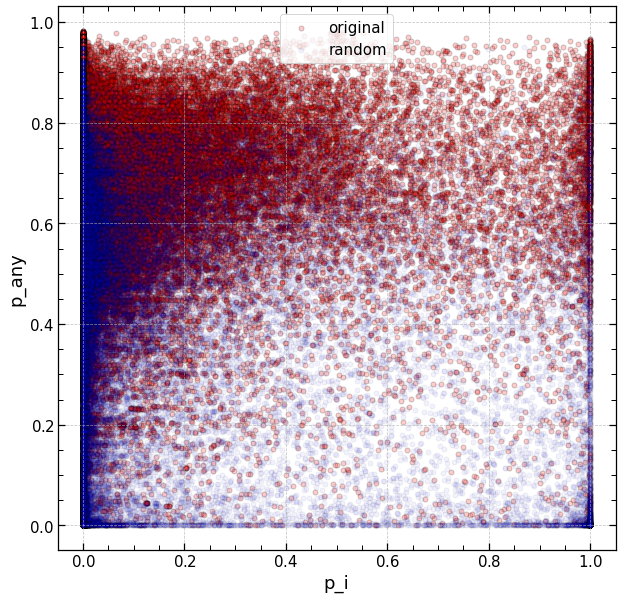

In [46]:
plt.figure(figsize=(10,10))
plt.scatter(nway_res_ero.prob_this_match, nway_res_ero.prob_has_match, alpha = 0.2, c = 'red', label = 'original')
plt.scatter(nway_res_ero_random.prob_this_match, nway_res_ero_random.prob_has_match, alpha = 0.05, c = 'blue', label = 'random')
plt.xlabel('p_i')
plt.ylabel('p_any')
plt.legend()